# Iris SVM classifier example

Simple example of SVM classifier using the Iris dataset.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import sklearn.datasets
import sklearn.svm

Load the Iris data

In [2]:
iris_data = sklearn.datasets.load_iris()
x = iris_data.data[:, 0]
y = iris_data.data[:, 1]
iris_classes = iris_data.target[:]
iris_names = iris_data.target_names[iris_data.target[:]]

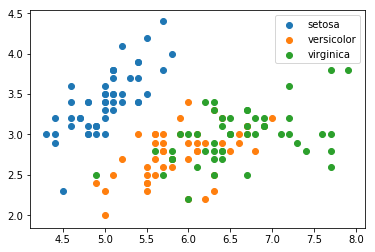

In [3]:
fig, ax = plt.subplots()
for i in range(3):
    ax.scatter(
        x[np.where(iris_data.target == i)],
        y[np.where(iris_data.target == i)],
        label=iris_data.target_names[i])
ax.legend()
plt.show()

Train the SVM classifier

In [4]:
clf = sklearn.svm.LinearSVC()
clf = clf.fit(iris_data.data[:, 0:2], iris_data.target)

Plot the classifier decision boundaries.

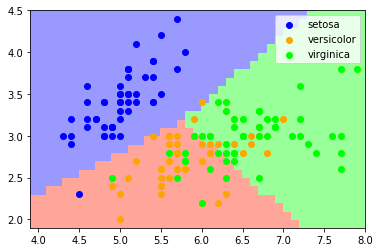

In [5]:
# Make a grid of points
x_pos = np.arange(3.5, 8.5, 0.1)
y_pos = np.arange(1.5, 5.0, 0.1)
xv, yv = np.meshgrid(x_pos, y_pos)
mesh_data = np.column_stack((xv.ravel(), yv.ravel()))

# Run each mesh point through the classifier
predictions = clf.predict(mesh_data)

# Do a pcolormesh plot of the mesh point predictions
fig, ax = plt.subplots()
ax.set_autoscalex_on(False)
ax.set_xlim([3.9, 8.0])
ax.set_autoscaley_on(False)
ax.set_ylim([1.9, 4.5])
plt.pcolormesh(
    x_pos, y_pos,
    predictions.reshape(y_pos.shape[0], x_pos.shape[0]),
    cmap=matplotlib.colors.ListedColormap(['#9999FF', '#FFA599', '#99FF99']))

# Overlay a scatter plot of the original data
for i in range(3):
    ax.scatter(
        x[np.where(iris_data.target == i)],
        y[np.where(iris_data.target == i)],
        label=iris_data.target_names[i],
        color=('#0000FF', '#FFA500', '#00FF00')[i])

ax.legend()
plt.show()